# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Ava Slade

**ID**: aes372

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/bee4750/hw1-aes372`
   Installed GR_jll ────────────────────── v0.73.5+0
   Installed NetworkLayout ─────────────── v0.4.6
   Installed EarCut_jll ────────────────── v2.2.4+0
   Installed OffsetArrays ──────────────── v1.14.0
   Installed ArnoldiMethod ─────────────── v0.4.0
   Installed ConcurrentUtilities ───────── v2.4.1
   Installed StaticArrays ──────────────── v1.9.4
   Installed IJulia ────────────────────── v1.24.2
   Installed GLFW_jll ──────────────────── v3.3.9+0
   Installed StaticArraysCore ──────────── v1.4.2
   Installed GraphRecipes ──────────────── v0.5.13
   Installed TranscodingStreams ────────── v0.10.9
   Installed Ratios ────────────────────── v0.4.5
   Installed CodecZlib ─────────────────── v0.7.4
   Installed Graphs ────────────────────── v1.11.0
   Installed Xorg_libxcb_jll ───────────── v1.15.0+0
   Installed TableTraits ───────────────── v1.0.1
   Installed Conda ─────────────────────── v1.10.0
   Installed GeometryTypes ──────────

Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [2]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [4]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


**Solution**:

The error in the logic comes from setting min_value = 0 at the beginning of the function. When min_value is compared to each value in the array, none of the values in the array is less than 0, and therefore a new min_value is never set. In the fixed version of the function below, min_value was initialized to infinity instead of 0 so that it is guaranteed to change when compared to the first value in the array. 

In [5]:
function minimum(array)
    min_value = Inf
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [6]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

**Solution**:

The code produced an error due to syntax errors. First, the function tried taking the mean of 'student_grades', but it should take the mean of 'grades', which is the input variable. Next, 
the initial code tried using the 'mean()' function without installing the Statistics package first. In the fixed version, the average was manually calculated by using the 'sum()' function to find the sum of the elements in the array, and then dividing the sum by the length of the array. Finally, the code tried calculating the average by simply displaying 'average_grade', which is only defined in the scope of the function and not defined outside of the function, so it cannot be displayed. This problem was solved in the fixed version by inputting the 'student_grades' array into the 'class_average()' function to calculate the average. 

In [85]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = sum(grades) / length(grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [9]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

**Solution**:

There is a syntax error when defining the array of outcomes. In the fixed version 'outcomes' is defined as zeros(n_trials) instead of zero(n_trials). There is also a logic error when determining if an outcome counts as a win. > is used instead of >=, so an 11 doesn't count as a win even though it should. In the fixed version >= is used. 

In [41]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) >= 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.508


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [17]:
function mystery_function(values)
    # initialize output array
    y = [] 
    # loop through elements in the input array
    for v in values
        # add each element to the output array only if it is not already there
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.


**Solution**:

The purpose of `mystery_function` is to go through an input array and filter out repeated elements. So `mystery_function` returns an array with the same elements as the original array, but without any repeated elements. 

The built-in Julia function that does the same thing as `mystery_function` is `union`, which returns an array containing the elements from the input array minus duplicates. The code using  `union` is shown below. 

In [16]:
function mystery_function(values)
    y = union(values)
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

mystery_function(list_of_values) = [1, 2, 3, 4]


### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

In [148]:
function compute_mean(v)
    sum = 0
    for value in v 
        sum = sum + value
    end
    return sum / length(v)
end

random_vect = rand(10)
new_vect = random_vect .- compute_mean(random_vect)
@show compute_mean(new_vect)

compute_mean(new_vect) = 0.0


0.0

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

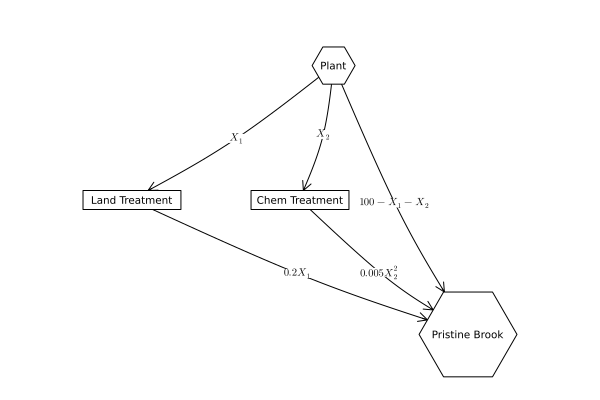

In [83]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"100 - X_1 - X_2", 
(2, 4) => L"0.2X_1", (3, 4) => L"0.005X_2^2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

### Model Derivation

**Defining Variables**:

$X_1$ is the amount of wastewater entering the Land Treatment. $X_2$ is the amount of wastewater entering the Chemical Treatment. C is the concentration of YUK in the wastewater.


**Modeling the three inputs of YUK into Pristine Brook in kg/day**: 

The amount of YUK (in kg/day) can be found for each input using the equation Q * C, where Q is the flow of YUK from a particular treatment system. The flows of YUK are shown on the edge labels in Figure 1. For land and chemical treatment, the flows of YUK were found by multiplying the flow of wastewater into the treatment system by the efficiency of the treatment system. The flow of YUK from direct dumping is simply equal to the remaining flow of wastewater which was not allocated to a treatement system.

The amount of YUK from the wastewater allocated to land treatment is modeled by 
$$YUK_{land} = 0.2 * X_1 * C$$

The amount of YUK from the wastewater allocated to chemical treatment is modeled by
$$YUK_{chem} = 0.005 * X_2^2 * C$$

The remaining amount of YUK comes from directly dumping the untreated wastewater, which is modeled by 
$$ YUK_{direct} = (100 - X_1 - X_2) * C $$


**Modeling the costs of the two different treatment systems in $/day**: 

The cost of the land treatment is modeled by

$$ Cost_{land} = (X_1^2) / 20 $$

The cost of the chemical treatment is modeled by

$$ Cost_{chem} = (1.5 * X_2) $$


**Mathematical Model**: 

The total amount of YUK discharged into Pristine Brook is a sum of the three inputs and the total treatment cost is a sum of the costs of the land and chemical treatments.

$$ YUK_{total} = YUK_{land} + YUK_{chem} + YUK_{direct} $$

$$ Cost_{total} = Cost_{land} + Cost_{chem} $$

### Code solution

The following code includes a function which calculates the total cost and total amount of YUK entering Pristine Brook given the flow of wastewater, the concentration of YUK in the wastewater, and the proportions of wastewater allocated to land and chemical treatment. The function was created by writing the above models as code. 

The rest of the code uses the function to test 15 different wastewater allocation scenarios, and plots the resulting cost and amount of YUK for each scenario. The different scenarios, where (p1, p2, p3) represents (the proportion of wastewater going to land treatment, the proportion of wastewater going to chemical treatment, the proportion of wastewater going to direct dumping), are as follows: 
(1,0,0), (0.8,0.2,0), (0.6,0.4,0), (0.4,0.6,0), (0.2,0.8,0), (0,0,1),
(0,0.2,0.8), (0,0.4,0.6), (0,0.6,0.4), (0,0.8,0.2), (0,1,0), (0.2,0,0.8),
(0.4,0,0.6), (0.6,0,0.4), (0.8,0,0.2)

output = yuk_cost_and_amount.(Q, C, vec1, vec2) = [(500.0, 20.0), (350.0, 18.0), (240.0, 20.0), (170.0, 26.0), (140.0, 36.0), (0.0, 100.0), (30.0, 82.0), (60.0, 68.0), (90.0, 58.0), (120.0, 52.0), (150.0, 50.0), (20.0, 84.0), (80.0, 68.0), (180.0, 52.0), (320.0, 36.0)]


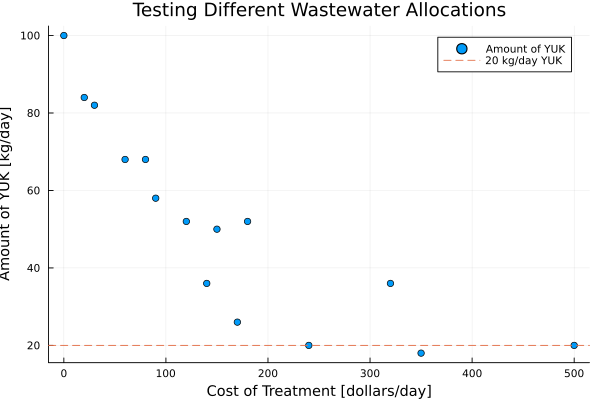

In [162]:
function yuk_cost_and_amount(Q, C, p1, p2)
    
    # calculate the amount of wastewater for each method
    X1 = p1 * Q
    X2 = p2 * Q
    
    # calculate cost per method
    cost1 = (X1^2) / 20
    cost2 = 1.5 * X2

    # calculate the amount of YUK for each method
    m1 = X1 * C * 0.2
    m2 = (X2^2) * C * 0.005
    m3 = (100 - X1 - X2) * C

    # calculating total amount of YUK and total cost 
    total_yuk = m1 + m2 + m3
    total_cost = cost1 + cost2

    return (total_cost, total_yuk)

end

# Defining variables
Q = 100
C = 1

# vec1 represents the different proportions of wastewater going to land treatment
vec1 = [1, 0.8, 0.6, 0.4, 0.2, 0, 0.0, 0.0, 0.0, 0.0, 0, 0.2, 0.4, 0.6, 0.8]
# vec2 represents the different proportions of wastewater going to chemical treatment
vec2 = [0, 0.2, 0.4, 0.6, 0.8, 0, 0.2, 0.4, 0.6, 0.8, 1, 0.0, 0.0, 0.0, 0.0]

# calculate the cost and amount of YUK for the different allocations of wastewater and plot results
@show output = yuk_cost_and_amount.(Q, C, vec1, vec2)
plot(output, seriestype=:scatter, thickness_scaling=.89, label="Amount of YUK")
hline!([20], linestyle=:dash, label="20 kg/day YUK")
xlabel!("Cost of Treatment [dollars/day]")
ylabel!("Amount of YUK [kg/day]")
title!("Testing Different Wastewater Allocations")

In [160]:
# One combination of wastewater discharge and treatment which satisfies the YUK effluent 
# standard, as graphed above.

Q = 100
C = 1
p1 = 0.60 # proportion of wastewater going to land treatment
p2 = 0.40 # proportion of wastewater going to chemical treatment
@show yuk_cost_and_amount(Q, C, p1, p2)

yuk_cost_and_amount(Q, C, p1, p2) = (240.0, 20.0)


(240.0, 20.0)

One combination of wastewater discharge and treatment which satisfies the YUK effluent standard of 20 kg/day is 60% of the wastewater towards land treatment, 40% towards chemical treatment, and 0% towards direct dumping. This scenario would cost $240/day. From testing out different scenarios, I can generally say that treatment cost increases as you try to get lower YUK concentrations, but not always. To find a better solution, I would need to test out many more wastewater allocation scenarios. This could be done by using a loop to create much longer input vectors, so that a more accurate solution to the problem could be found. 

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

I used https://docs.juliaplots.org/latest/tutorial/ to help me figure out how to create a scatter plot for question 4.

I consulted with Lily Blyn (llb229) and Romir Anand (ra493) on the modeling in question 4.